# Анализ стратегии взаимодействия с клиентами сети финтес-клубов

# План работы
1. [Цель работы](#section_1)
2. [Загрузка данных](#section_2)
3. [Исследовательский анализ данных (EDA)](#section_3)
4. [Модель прогнозирования оттока клиентов](#section_4)
5. [Кластеризация клиентов](#section_5)
6. [Основной вывод и базовые рекомендации по работе с клиентами](#section_6)

<a id='section_1'></a>
## Цель работы
Отдел по работе с клиентами фитнес-центра перевёл в электронный вид множество клиентских анкет. Наша задача - провести анализ данных и выработать план действий по удержанию клиентов. Отток клиентов - распространённая проблема подобных центров и сервисов. Не всегда уход клиентов явный - не все просят закрывать договор, гораздо чаще посетители просто потихоньку перестают пользоваться сервисом. У разных отраслей отличаются индикаторы оттока. Так, для фитнес-клубов обычно считается что если за последний месяц клиент ни разу не посетил спортзал, то он попал в отток. В рамках данной работы мы должны:  
1) на уровне следующего месяца научиться прогнозировать вероятность оттока для каждого клиента;  
2) выделить наиболее яркие группы клиентов (типичные портреты), охарактеризовать их основные свойства;  
3) провести анализ оснонвых признаков, наиболее влияющих на отток клиентов;  
4) сформулировать основной вывод, выделить целевые группы клиентов, предложить меры по снижению оттока, определить другие особенности взаимодействия с клиентами.

<a id='section_2'></a>
## Загрузка данных

Фитнес-центр предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных содержит следующие поля:
* *gender* — пол;
* *Near_Location* — проживание или работа в районе, где находится фитнес-центр;
* *Partner* — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* *Promo_friends* — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* *Phone* — наличие контактного телефона;
* *Age* — возраст;
* *Lifetime* — время с момента первого обращения в фитнес-центр (в месяцах)
* *Contract_period* — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* *Month_to_end_contract* — срок до окончания текущего действующего абонемента (в месяцах);
* *Group_visits* — факт посещения групповых занятий;
* *Avg_class_frequency_total* — средняя частота посещений в неделю за все время с начала действия абонемента;
* *Avg_class_frequency_current_month* — средняя частота посещений в неделю за предыдущий месяц;
* *Avg_additional_charges_total* — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
* *Churn* — факт оттока в текущем месяце


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')
display(df.head(5))
df.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [3]:
#изменение регистра названий столбцов и изменение типа данных.
df.columns = map(str.lower, df.columns)
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

### Вывод
Данные загружены и обработаны. Пропусков данных не имеется.

<a id='section_3'></a>
## Исследовательский анализ данных (EDA)

Исследуем датасет. Посмотрим отсутствующие признаки, изучим средние значения и стандартные отклонения данных.

In [4]:
display(df.describe())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Видим равное количество мужчин и женщин среди клиентов, средний возраст клиента 29 лет, почти все проживают в непосредственной близости от клуба, который они посещают. Примерно половина посетителей ходят как сотрудники компании-партнёра по специальной программе. Пришедших по программе "Приведи друга" - 30 процентов. В среднем клиенты посещают зал около 2 раз неделю, на групповые занятия ходят сорок процентов посетителей. Большинство абонементов приобретается сроком на один месяц.

Отток в текущем месяце - 26 процентов.  Сравним две группах — тех, кто ушел в отток и тех, кто остался.

In [5]:
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


В группе оттока можно отметить несколько вещей:  
1) в оттоке немногим меньше клиентов, живущих рядом с клубом;  
2) меньше тех, кто занимался по партнёрской программе;  
3) меньше пришедших по программе "Приведи друга";  
4) средний возраст ниже на три года;  
5) средний срок абонемента существенно ниже;  
6) средний лайфтайм клиента около месяца - против пяти у тех, кто продолжает ходить в клуб;  
7) видно снижение количества посещений в неделю в последний месяц  

Довольно распространённая картина, когда клиент купил абонемент на месяц, позанимался немного и не стал его продлевать по каким-либо причинам (не понравился зал, пропало желание заниматься и так далее). С возрастом формируется больше привычек, поэтому средний возраст клиентов в оттоке несколько ниже, чем у тех, кто остался.  
Построим гистограммы распределения для признаков, столбчатые графики для бинарных признаков, а также матрицу корреляций для изучения.

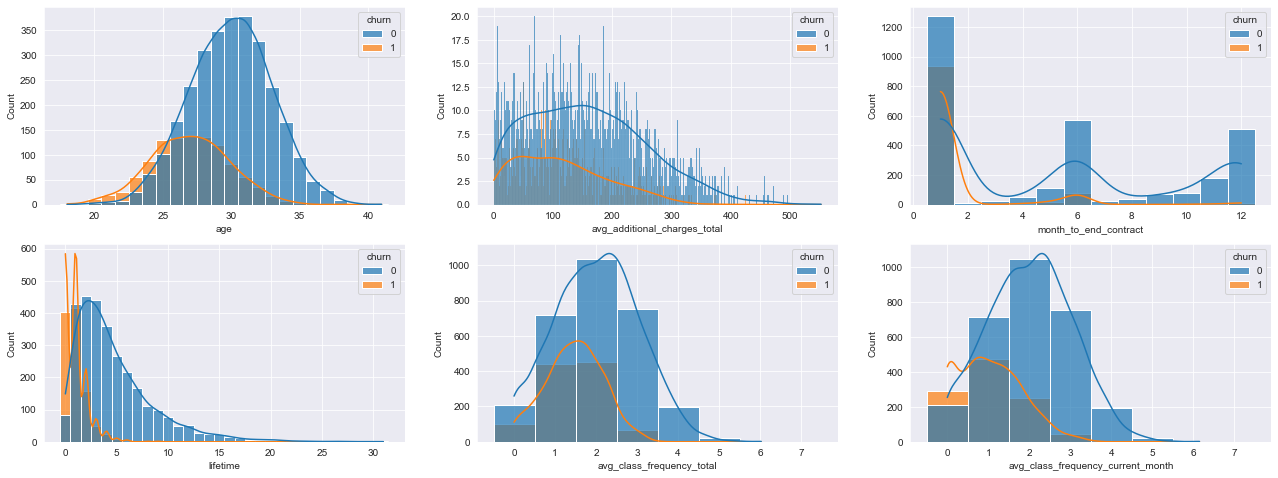

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(22, 8))
for i, col in enumerate(['age', 'avg_additional_charges_total', 'month_to_end_contract', 
                            'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']):
    sns.histplot(df, x=col, hue = 'churn', kde = True, discrete=True, alpha = .7, ax=plt.subplot(2, 3, i + 1))

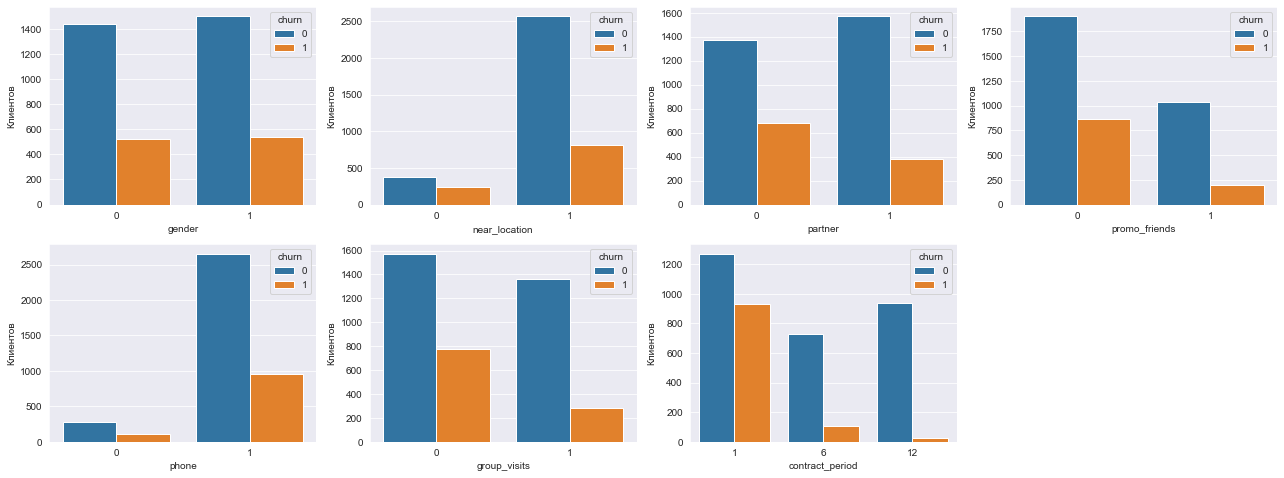

In [7]:
plt.figure(figsize=(22, 8))
for i, col in enumerate(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'contract_period']):
    sns.countplot(x = col, hue='churn', data=df, ax=plt.subplot(2, 4, i + 1))
    plt.ylabel('Клиентов')

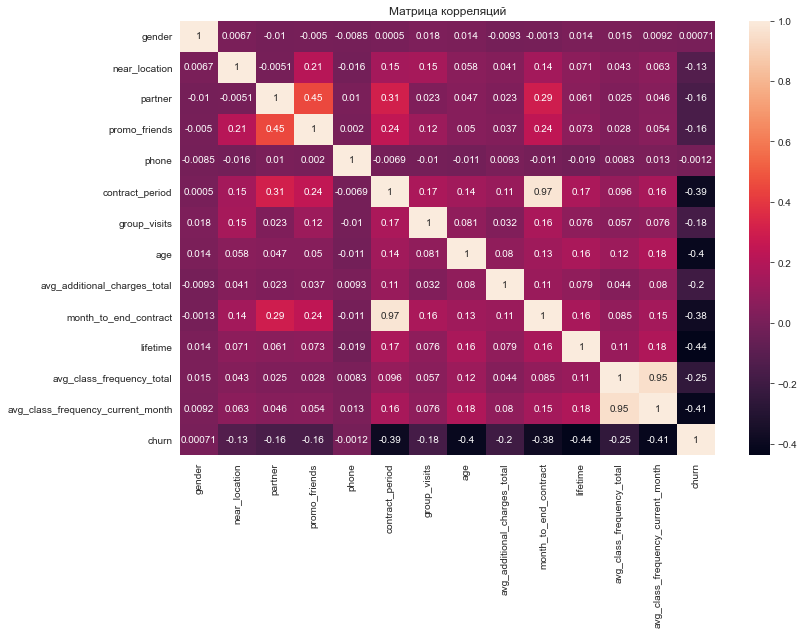

In [8]:
#построим матрицу корреляций для признаков
plt.figure(figsize=(12,8))
sns.heatmap(data = df.corr(), annot=True)
plt.title('Матрица корреляций')
plt.show()

### Вывод
Построил графики распределения признаков и матрицу корреляций. Проанализировав их, можно увидеть некоторые подтверждения первоначальным выводам. В группе оттока в основном те, кто брал абонемент на месяц, они в среднем немногим младше, и это зачастую новые недавно появившиеся клиенты. Также можно заметить, что занимающиеся по партнёрской программе или пришедшие по акции "Приведи друга" клиенты утекают с меньшей вероятностью.  
Имеются сильные корреляции признаков contract_period и month_to_end_contract, а также avg_class_frequency_total и avg_class_frequency_current_month. Это довольно ожидаемо, и это стоит учитывать.

<a id='section_4'></a>
## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. Для начала нам нужно разбить данные на обучающую и валидационную выборку, а после - обучить модель на train выборке двумя способами - логистической регрессией и случайным лесом.  
Сначала уберём признаки month_to_end_contract и avg_class_frequency_current_month, так как у них есть сильно коррелирующие пары. Так наша модель будет работать лучше.

In [9]:
y = df['churn'] #выделяем целевую переменную
X = df.drop(['churn', 'month_to_end_contract', 'avg_class_frequency_current_month'], axis=1) #убириаем целевую переменную и коррелирующие признаки

#разделяем модель на обучающую и валидационную выборку в пропорции 80 и 20 процентов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 
scaler = StandardScaler() #стандартизируем данные 
X_train_st = scaler.fit_transform(X_train) # scaler применяем к обучающей выборке
X_test_st = scaler.transform(X_test) #применяем стандартизацию к матрице признаков для тестовой выборки

In [10]:
def printmetrics(y_test, pred_y): #функция для вывода метрик
    print('Метрики:\nAccuracy: {:.2f}\nPrecision: {:.2f}\nRecall:{:.2f}'.format(
    accuracy_score(y_test, pred_y),
    precision_score(y_test, pred_y),
    recall_score(y_test, pred_y))
    )

In [11]:
model_logr = LogisticRegression(random_state=0) #задаём алгоритм логистической регресии для нашей модели
model_logr.fit(X_train_st, y_train) #обучаем модель

# пользуемся уже обученной моделью, чтобы сделать прогнозы
predictions_logr = model_logr.predict(X_test_st)
probabilities_logr = model_logr.predict_proba(X_test_st)[:,1]

printmetrics(y_test, predictions_logr) # #выводим метрики

Метрики:
Accuracy: 0.91
Precision: 0.83
Recall:0.83


In [12]:
#задаём алгоритм слуйчайного леса для модели
model_rfor = RandomForestClassifier(n_estimators = 100, random_state = 0) 
model_rfor.fit(X_train_st, y_train)

predictions_rfor = model_rfor.predict(X_test_st)
probabilities_rfor = model_rfor.predict_proba(X_test_st)[:,1]

printmetrics(y_test, predictions_rfor) # #выводим метрики

Метрики:
Accuracy: 0.89
Precision: 0.81
Recall:0.79


### Вывод
Обе модели показывают себя здесь очень хорошо, довольно высокая доля правильных прогнозов - 92%. По метрикам точности и полноты метод логистической регресии показал себя немного лучше метода случайного леса.

<a id='section_5'></a>
## Кластеризация клиентов

Построим матрицу расстояний с помощью применения функции linkage() на стандартизованной матрице признаков. С помощью дендрограммы, отрисованной от этой матрицы можно будет увидеть, на какое количество кластеров можно поделить клиентов.

In [ ]:
#обязательная стандартизация данных перед работой с алгоритмами
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')

#linked - таблица «связок» между объектами, её визуализируем как дендрограмму: 
plt.figure(figsize=(18, 8))
dendrogram(linked, orientation='top')
plt.title('Кластеризация')
plt.show()

По графику иерархической кластеризации визуально можно увидеть 6 больших кластеров.  
Обучим модель кластеризации по алгоритму K-Means и спрогнозируем кластеры клиентов. Число кластеров принимаем как 5, как того требует наша задача.

In [ ]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров 5, random_state 0 для воспроизводимости результата
labels = km.fit_predict(X_st) # применяем алгоритм к данным и формируем вектор кластеров
df['cluster_km'] = labels # сохраняем метки кластера в поле нашего датасета
display(df.groupby('cluster_km').mean().round(2)) #средние значения признаков для кластеров
df.groupby('cluster_km')['cluster_km'].count() #количество клиентов в кластере

5 кластеров клиентов - сразу можно увидеть существенные различия в полях, касаемых сроков абонементов, и недельной посещаемости финтнес-зала. Есть два кластера с очень низким показателем оттока.  
Изучим получившиеся кластеры поподробнее. Построим по ним графики распределения признаков.

In [ ]:
palette = sns.color_palette('tab10')

#графики распределения для количественных признаков
plt.figure(figsize=(22, 10))
for i, col in enumerate(['age', 'avg_additional_charges_total', 'month_to_end_contract', 
                         'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']):
    sns.histplot(df, x=col, hue = 'cluster_km', kde = True, palette=palette[:5], discrete=True, multiple="dodge", alpha = .7, ax=plt.subplot(2, 3, i + 1))

In [ ]:
plt.figure(figsize=(22, 8))
for i, col in enumerate(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'contract_period', 'churn']):
    sns.countplot(x = col, hue='cluster_km', data=df, palette=palette[:5], ax=plt.subplot(2, 4, i + 1))
    plt.ylabel('Клиентов')

### Вывод
Можно выделить два кластера с самой низкой долей оттока: кластер 0 с долей 3% и кластер 4 с долей 7%. Они отличаются с среднем несколько более частой посещаемостью фитнес-центра, это более старшие клиенты (и по возрасту, и по давности посещений). Клиенты кластера 0 как правило заключают долгосрочные абонементы и занимаются к тому же по партнёрской программе.  
Кластеры 2 и 3 с высоким уровнем оттока, причём кластер 3 самый многочисленный из всех. По среднему возрасту в нём самые молодые посетители, как правило это клиенты без партнерской программы, пришедшие не в рамках акции, живущие поблизости от финтес-клуба. Посещаемость слабее, чем у остальных кластеров, абонемент, как правило, не более месяца.

<a id='section_6'></a>
## Основной вывод и базовые рекомендации по работе с клиентами

Для работы была предоставлена база данных сети фитнес-центров с данными о клиентах на месяц для изучения оттока. Данные были загружены и обработаны, проведён исследовательский анализ данных. Изучен примерный портрет среднего посетителя, а так же отдельно изучены группы оттока и тех, кто остался. Построил графики распределения и матрицу корреляций, были определены некоторые зависимости между признаками. Для дальнейшего анализа была построена модель прогнозирования оттока клиентов с помощью двух способов: логистическая регресиия и алгоритм случайного леса. С помощью метрик определил, что обе модели довольно точны, метод логистической регресии показал себя немного лучше.  
С помощью матрицы расстояний на основании алгоритма K-Means выполнил кластеризаию клиентов сети фитнес-клубов. Были выделены 5 кластеров, которые я изучил поподробнее с томощью таблиц и графиков распределения.  

На основе анализа данных можно дать некоторые рекомендации по стратегии работы с клиентами:  
1) Разработать программу скидок и бонусов для поощрения оформления более длительных абонементов. С учётов сохранения высокого уровня сервиса создать привычку ходить в фитнес-центр на постоянной основе.  
2) Для удержания более молодой аудитории финтес-клубов подумать над изменением или добавлением новых фитнес-программ, тренажёров, а также программ поощрения.  
3) Все новые акции, программы скидок и бонусов максимально доступно и просто предлагать всем новым клиентам, приходящим в зал. Возможно разместить бросающуюся в глаз информацию возле входа с главными предложениями. Есть вероятность таким образом увеличить удержанию пришедших в зал "на один раз" посетителей, живущих неподалёку.